## Load the dataset

In [5]:
import pandas as pd

train_df = pd.read_csv(r"C:\Users\ruchi\Documents\Chaos in the multiverse\train_data.csv")
test_df = pd.read_csv(r"C:\Users\ruchi\Documents\Chaos in the multiverse\test_data.csv")

display(train_df.head())
display(test_df.head())

,w,x,y
0,-2.5,-2.784390,0.596025
1,-2.5,-2.308732,-0.449801
2,-2.5,-3.869936,-0.301154
3,-2.5,-2.671678,0.399640
4,-2.5,6.609344,0.700448


,w,x
0,-2.5,-20.640539
1,-2.5,21.636451
2,-2.5,-16.856414
3,-2.5,89.961916
4,-2.5,13.535599


## Visualize the entire dataset

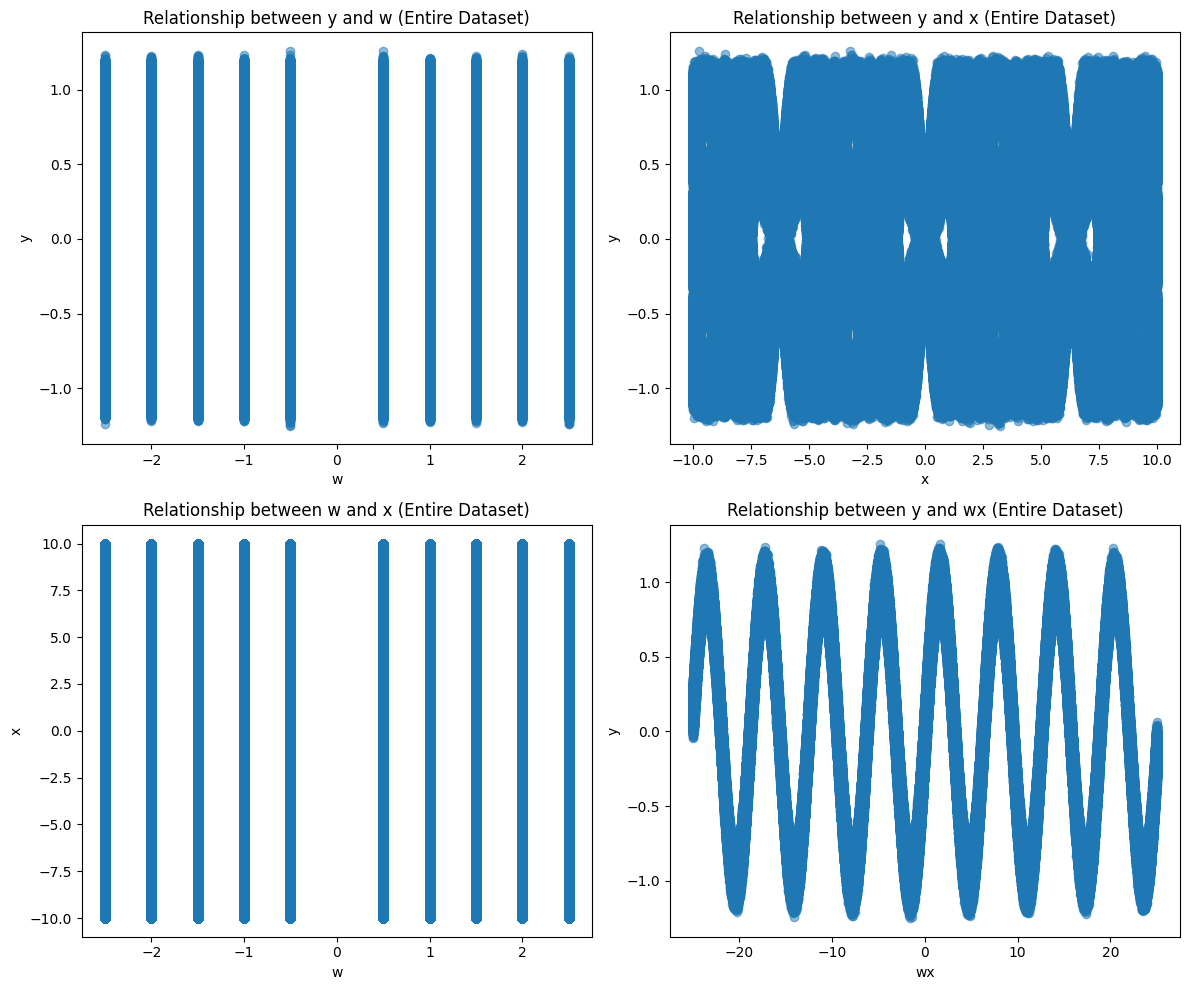

In [10]:
import matplotlib.pyplot as plt

# Use the entire training dataframe
train_df['wx'] = train_df['w'] * train_df['x']

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(train_df['w'], train_df['y'], alpha=0.5)
plt.title('Relationship between y and w (Entire Dataset)')
plt.xlabel('w')
plt.ylabel('y')

plt.subplot(2, 2, 2)
plt.scatter(train_df['x'], train_df['y'], alpha=0.5)
plt.title('Relationship between y and x (Entire Dataset)')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2, 2, 3)
plt.scatter(train_df['w'], train_df['x'], alpha=0.5)
plt.title('Relationship between w and x (Entire Dataset)')
plt.xlabel('w')
plt.ylabel('x')

plt.subplot(2, 2, 4)
plt.scatter(train_df['wx'], train_df['y'], alpha=0.5)
plt.title('Relationship between y and wx (Entire Dataset)')
plt.xlabel('wx')
plt.ylabel('y')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Feature Engineering Z = W*X

In [15]:
train_df['z'] = train_df['w'] * train_df['x']
yz_df = train_df[['y', 'z']].copy()

display(yz_df.head())

,y,z
0,0.596025,6.960974
1,-0.449801,5.771829
2,-0.301154,9.674841
3,0.399640,6.679196
4,0.700448,-16.523361


## Spliting equally spaced points to still capture the sin relationship

In [18]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the yz_df into training and testing sets
# X will be the feature 'z' and y will be the target 'y'
X = yz_df[['z']]
y = yz_df['y']

# To preserve the sinusoidal relationship, we will sample by sorting and taking equally spaced points
# First, sort the DataFrame by 'z'
yz_df_sorted = yz_df.sort_values(by='z').reset_index(drop=True)

# 1% of the dataset
n_samples = int(len(yz_df_sorted) * 0.01)

#equally spaced samples
sampled_indices = np.linspace(0, len(yz_df_sorted) - 1, n_samples, dtype=int)
yz_sampled = yz_df_sorted.iloc[sampled_indices]

X_sampled = yz_sampled[['z']]
y_sampled = yz_sampled['y']

#split sampled data
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800000, 1)
Shape of X_test: (200000, 1)
Shape of y_train: (800000,)
Shape of y_test: (200000,)


## Train an xg boost model

In [24]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

xgb_model_z = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=200,
                             learning_rate=0.1,
                             max_depth=6,
                             random_state=42
                             )

xgb_model_z.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [25]:
y_pred_z = xgb_model_z.predict(X_test)
rmse_z = np.sqrt(mean_squared_error(y_test, y_pred_z))

print(f"Root Mean Squared Error on the test set using 'z' feature: {rmse_z}")

Root Mean Squared Error on the test set using 'z' feature: 0.07356392484327315


In [26]:
test_df['z'] = test_df['w'] * test_df['x']

# Use the trained model to predict 'y' values for the test dataset
X_test_full = test_df[['z']]
y_pred_test_full = xgb_model_z.predict(X_test_full)

# Add the predicted 'y' values to the test_df
test_df['y_predicted'] = y_pred_test_full

display(test_df.head())

,w,x,z,y_predicted
0,-2.5,-20.640539,51.601348,-0.556708
1,-2.5,21.636451,-54.091127,0.560312
2,-2.5,-16.856414,42.141035,-0.556708
3,-2.5,89.961916,-224.904790,0.560312
4,-2.5,13.535599,-33.838997,0.560312


## save to csv

In [29]:
test_df.to_csv('/content/test_data_with_predictions.csv', index=False)

Test data with predictions saved to '/content/test_data_with_predictions.csv'
